In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import display
import talib
from talib import *

In [2]:
df = pd.read_csv("C:\\Users\\bimalgupta\\Desktop\\Data Analysis\\Time-Series\\Data\\nifity_Stock_all_adjusted_price.csv",
                parse_dates=True,infer_datetime_format=True)

In [3]:
df.head()

,Unnamed: 0,Symbol,Date,Adj_Open_Price,Adj_Low_Price,Adj_High_Price,Adj_Close_Price,Return,Return1,Cum_daily_return
0,0,ADANIPORTS,2007-11-27,770.00,770.0,1050.00,962.90,NaN,NaN,NaN
1,1,ADANIPORTS,2007-11-28,984.00,874.0,990.00,893.90,0.071659,-0.071659,0.928341
2,2,ADANIPORTS,2007-11-29,909.00,841.0,914.75,884.20,0.010851,-0.010851,0.918268
3,3,ADANIPORTS,2007-11-30,890.00,890.0,958.00,921.55,0.042242,0.042242,0.957057
4,4,ADANIPORTS,2007-12-03,939.75,922.0,995.00,969.30,0.051815,0.051815,1.006647


In [4]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
df.columns = ['Symbol','Date','Open_Price','Low_Price','High_Price','Close_Price','Return','Return1','Cum_daily_return']

In [6]:
df.head()

,Symbol,Date,Open_Price,Low_Price,High_Price,Close_Price,Return,Return1,Cum_daily_return
0,ADANIPORTS,2007-11-27,770.00,770.0,1050.00,962.90,NaN,NaN,NaN
1,ADANIPORTS,2007-11-28,984.00,874.0,990.00,893.90,0.071659,-0.071659,0.928341
2,ADANIPORTS,2007-11-29,909.00,841.0,914.75,884.20,0.010851,-0.010851,0.918268
3,ADANIPORTS,2007-11-30,890.00,890.0,958.00,921.55,0.042242,0.042242,0.957057
4,ADANIPORTS,2007-12-03,939.75,922.0,995.00,969.30,0.051815,0.051815,1.006647


In [7]:
df1=df[df.Symbol.isin(['ADANIPORTS'])] # subset the data

In [8]:
df1.dtypes

Symbol               object
Date                 object
Open_Price          float64
Low_Price           float64
High_Price          float64
Close_Price         float64
Return              float64
Return1             float64
Cum_daily_return    float64
dtype: object

In [9]:
df1.loc[:,'Date'] = pd.to_datetime(df1.Date,format="%Y-%m-%d",infer_datetime_format=True)

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
df1.dtypes

Symbol                      object
Date                datetime64[ns]
Open_Price                 float64
Low_Price                  float64
High_Price                 float64
Close_Price                float64
Return                     float64
Return1                    float64
Cum_daily_return           float64
dtype: object

In [11]:
df1.fillna(0,inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [13]:
import copy

In [14]:
tek_ind1= copy.copy(df1) # let's make the copy of data

In [15]:
print('Total dataset has {} sample, and {} feature'.format(tek_ind1.shape[0],tek_ind1.shape[1]))

Total dataset has 2825 sample, and 9 feature


In [32]:
# For DL modeling i will use tek_ind2 dataframe

In [16]:
tek_ind1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2825 entries, 0 to 2824
Data columns (total 9 columns):
Symbol              2825 non-null object
Date                2825 non-null datetime64[ns]
Open_Price          2825 non-null float64
Low_Price           2825 non-null float64
High_Price          2825 non-null float64
Close_Price         2825 non-null float64
Return              2825 non-null float64
Return1             2825 non-null float64
Cum_daily_return    2825 non-null float64
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 220.7+ KB


In [17]:
np.random.seed(50)
data_df =copy.copy(tek_ind1)

In [18]:
data_df.drop('Date',inplace=True,axis=1)

In [19]:
data_df.drop('Symbol',inplace=True,axis=1)

In [20]:
data_df.head()

,Open_Price,Low_Price,High_Price,Close_Price,Return,Return1,Cum_daily_return
0,770.00,770.0,1050.00,962.90,0.000000,0.000000,0.000000
1,984.00,874.0,990.00,893.90,0.071659,-0.071659,0.928341
2,909.00,841.0,914.75,884.20,0.010851,-0.010851,0.918268
3,890.00,890.0,958.00,921.55,0.042242,0.042242,0.957057
4,939.75,922.0,995.00,969.30,0.051815,0.051815,1.006647


In [21]:
data_df.Cum_daily_return.max(),data_df.Cum_daily_return.min()

(2.330200436182356, 0.0)

In [22]:
data_df.Return.max(),data_df.Return.min()

(0.20002176515398865, 0.0)

In [23]:
data_df.Return1.max(),data_df.Return1.min()

(0.20002176515398865, -0.17047054092097336)

In [24]:
# split the data into train & test set
train_size = int(len(data_df)*0.9)
test_size= len(data_df)-train_size
train,test=data_df.loc[0:train_size],data_df.loc[train_size:len(data_df)]

In [25]:
# split the data
train_size = int(len(data_df) * 0.9)
test_size = len(data_df) - train_size
train, test = data_df.iloc[0:train_size], data_df.iloc[train_size:len(data_df)]

In [26]:
# lets make the data on some scale
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

In [27]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [28]:
f_columns = ['Open_Price', 'High_Price', 'Low_Price',]
f_transformer = MinMaxScaler(feature_range=(-1, 1))
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(train.loc[:,f_columns].to_numpy())
test.loc[:, f_columns] = f_transformer.transform(test.loc[:,f_columns].to_numpy())

In [29]:
CP_transformer = MinMaxScaler(feature_range=(-1, 1))
CP_transformer = CP_transformer.fit(train[['Close_Price']])
train['Close_Price'] = CP_transformer.transform(train[['Close_Price']])
test['Close_Price'] = CP_transformer.transform(test[['Close_Price']])

In [30]:
# now make the dataset for LSTM model
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [31]:
# reshape to [samples, time_steps, n_features]
time_steps = 3
X_train, y_train = create_dataset(train, train.Close_Price, time_steps)
X_test, y_test = create_dataset(test, test.Close_Price, time_steps)

In [32]:
# create model
import keras
import tensorflow as tf

Using TensorFlow backend.


In [51]:
# dropout= 0.5, # units=512 lr=0.001, new :1more lstm #0.01

In [33]:
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=512,kernel_initializer='he_uniform',return_sequences=True,
                                  return_state=False,input_shape=(X_train.shape[1],X_train.shape[2])))
model_lstm.add(tf.keras.layers.Dropout(rate=0.3))

model_lstm.add(tf.keras.layers.LSTM(units=256,return_sequences=True,return_state=False))
model_lstm.add(tf.keras.layers.Dropout(rate=0.3))

model_lstm.add(tf.keras.layers.LSTM(units=256,return_sequences=False,return_state=False))
model_lstm.add(tf.keras.layers.Dense(units=1))
rms = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
model_lstm.compile(loss='mae',optimizer=rms)
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 512)            1064960   
_________________________________________________________________
dropout (Dropout)            (None, 3, 512)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 256)            787456    
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 2,377,985
Trainable params: 2,377,985
Non-trainable params: 0
______________________________________________

In [35]:
history_lstm = model_lstm.fit(X_train,y_train,
                             epochs=100,
                             batch_size=64,
                             validation_data = (X_test,y_test),
                             shuffle=False)

Train on 2539 samples, validate on 280 samples
Epoch 1/100
2539/2539 [==============================] - 11s 4ms/sample - loss: 0.1438 - val_loss: 0.4224
Epoch 2/100
2539/2539 [==============================] - 11s 4ms/sample - loss: 0.2635 - val_loss: 0.1175
Epoch 3/100
2539/2539 [==============================] - 11s 4ms/sample - loss: 0.1414 - val_loss: 0.0410
Epoch 4/100
2539/2539 [==============================] - 10s 4ms/sample - loss: 0.1796 - val_loss: 0.1734
Epoch 5/100
2539/2539 [==============================] - 10s 4ms/sample - loss: 0.1186 - val_loss: 0.2885
Epoch 6/100
2539/2539 [==============================] - 10s 4ms/sample - loss: 0.1915 - val_loss: 0.1553
Epoch 7/100
2539/2539 [==============================] - 10s 4ms/sample - loss: 0.1548 - val_loss: 0.3596
Epoch 8/100
2539/2539 [==============================] - 10s 4ms/sample - loss: 0.1361 - val_loss: 0.0707
Epoch 9/100
2539/2539 [==============================] - 9s 4ms/sample - loss: 0.1532 - val_loss: 0.4262


In [36]:
%matplotlib notebook
plt.plot(history_lstm .history['loss'],label='Train')
plt.plot(history_lstm .history['val_loss'],label='validation')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [37]:
y_pred = model_lstm.predict(X_test)

In [38]:
y_pred.shape

(280, 1)

In [39]:
pred_df = pd.DataFrame()
pred_df['y_test']= y_test

In [40]:
pred_df['y_pred'] = y_pred.reshape(280,)

In [41]:
pred_df['y_pred']=CP_transformer.inverse_transform(pred_df[['y_pred']])

In [42]:
pred_df['y_test'] = CP_transformer.inverse_transform(pred_df[['y_test']])

In [43]:
pred_df.head(10)

,y_test,y_pred
0,1889.50,1980.012817
1,1933.00,1909.142090
2,1926.00,1922.920044
3,1910.50,1923.436279
4,1910.75,1926.833008
5,1852.50,1929.485107
6,1821.50,1901.903076
7,1850.00,1900.693115
8,1818.50,1858.325928
9,1791.25,1823.177368


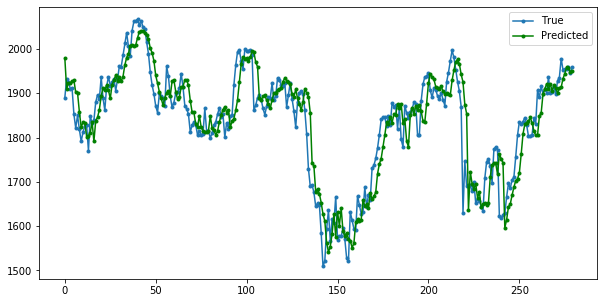

In [45]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(pred_df.y_test,marker='.',label=True)
plt.plot(pred_df.y_pred,marker='.',label='Predicted',color='green')
plt.legend()
plt.show()

In [48]:
pred_df['pred_prect_cahnge'] = pred_df.loc[:,'y_pred'].pct_change()

In [50]:
pred_df['org_pct_change'] = pred_df.loc[:,'y_test'].pct_change()

In [51]:
pred_df

,y_test,y_pred,pred_prect_cahnge,org_pct_change
0,1889.50,1980.012817,NaN,NaN
1,1933.00,1909.142090,-0.035793,0.023022
2,1926.00,1922.920044,0.007217,-0.003621
3,1910.50,1923.436279,0.000268,-0.008048
4,1910.75,1926.833008,0.001766,0.000131
...,...,...,...,...
275,1955.25,1944.475708,0.005986,0.001280
276,1954.50,1958.904785,0.007421,-0.000384
277,1958.75,1956.421997,-0.001267,0.002174
278,1946.25,1948.144897,-0.004231,-0.006382


In [52]:
pred_df.fillna(0,inplace=True)

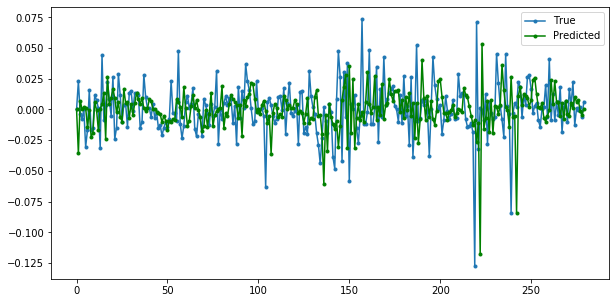

In [53]:
# now plot the pct change
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(pred_df.org_pct_change,marker='.',label=True)
plt.plot(pred_df.pred_prect_cahnge,marker='.',label='Predicted',color='green')
plt.legend()
plt.show()

In [54]:
pred_df.to_csv('LSTM_pre_t3_pct_change_pred.csv')